1.Induction
   This report presents an analysis of the factors influencing the Human Rights Index. 
   In the report, we first examine how economic, social and political variables effect the human rights. Then we investigate the continents' interact effect on those variables.
   We set human rights index as outcome variable, introduce "GDP", "Develop", "Age", "Labor", "Corruption", "Urban" as independent variables.
   Where "GDP" means the GDP per capita($).
         "Develop" means the human development index, ranging from 0 to 1.
         "Age" means the median age of the citizen. 
         "Labor" means the ratio of female to male labor force participation rates.
         "Corruption" means the corruption perception index, ranging from 0 to 100.
         "Urban" means the percentage of urban population, ranging from 0 to 1.
  The "GDP" and "Urban" are to measure the economic level, the "Develop", "Age" and "Labor" are to measure the social level while "Corruption" measures the polity.
  Then we use the country code to set a new categorical variable "Continent" which including "Asia", "Europe", "Africa", "Americas", "Oceania". 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, jarque_bera
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

2.Tidying data

In [23]:
# Read the data
data2 = pd.read_csv("D:/AAAglasgow/DAS/2project/data2.csv")

   All independent variables except Continent were standardized using the StandardScaler method, ensuring that they have a mean of 0 and a standard deviation of 1. 
   This step helps mitigate issues caused by differences in measurement scales.

In [25]:
# Standardize all the exlain variables
vars_to_standardize = ["GDP", "Develop", "Age", "Labor", "Corruption", "Urban"]
scaler = StandardScaler()
data2[vars_to_standardize] = scaler.fit_transform(data2[vars_to_standardize])

3.Fitting models
  Firstly, we use the multiple regression regardless the effect of interacton to see how those variables directly influence the human rights. So we fit the model 1.

In [29]:
# Model1
model1 = ols("human_rights_index ~ GDP + Develop + Age + Labor + Corruption + Urban", data=data2).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:     human_rights_index   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     20.55
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           1.19e-17
Time:                        07:21:20   Log-Likelihood:                 37.657
No. Observations:                 163   AIC:                            -61.31
Df Residuals:                     156   BIC:                            -39.66
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6812      0.015     44.302      0.0

In [31]:
from IPython.display import Latex

latex_string = r"""
\[
\text{{human\_rights\_index}} = \beta_0 + \beta_1 \times \text{{GDP}} + \beta_2 \times \text{{Develop}} + \beta_3 \times \text{{Age}} + \beta_4 \times \text{{Labor}} + \beta_5 \times \text{{Corruption}} + \beta_6 \times \text{{Urban}} + \epsilon
\]
"""

display(Latex(latex_string))

<IPython.core.display.Latex object>

  The p value of F-statistic is 1.19e-17, which indicates model 1 is statistically significant.
  All the variables except "Develop" are statistically significant. Among those significant variable, only the "GDP" has a negative ralationship with human rights index, which is different from the corrorlation plot and what we expected. To further analysis this question, we need to adjust our model.
  As we can see in the radar plot, the level of all the varieables differs from different continents. So we input the categorical variable "Continent" as an interaction effect to see more comprehensively how those varieables work on the human right index and fit the model 2.

In [33]:
# Model2
model2 = ols("human_rights_index ~ (GDP + Develop + Age + Labor + Corruption + Urban) * Continent", data=data2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:     human_rights_index   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     6.283
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           1.80e-14
Time:                        07:21:29   Log-Likelihood:                 66.373
No. Observations:                 163   AIC:                            -66.75
Df Residuals:                     130   BIC:                             35.35
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [35]:
latex_string = r"""
\[
\text{{human\_rights\_index}} = \beta_0 + \beta_1 \cdot \text{{GDP}} + \beta_2 \cdot \text{{Develop}} + \beta_3 \cdot \text{{Age}} + \beta_4 \cdot \text{{Labor}} + \beta_5 \cdot \text{{Corruption}} + \beta_6 \cdot \text{{Urban}} + \beta_7 \cdot \text{{Continent}} \\
+ \beta_8 \cdot (\text{{GDP}} \times \text{{Continent}}) + \beta_9 \cdot (\text{{Develop}} \times \text{{Continent}}) + \beta_{10} \cdot (\text{{Age}} \times \text{{Continent}}) \\
+ \beta_{11} \cdot (\text{{Labor}} \times \text{{Continent}}) + \beta_{12} \cdot (\text{{Corruption}} \times \text{{Continent}}) + \beta_{13} \cdot (\text{{Urban}} \times \text{{Continent}}) + \varepsilon
\]
"""

display(Latex(latex_string))

<IPython.core.display.Latex object>

  The p value of F-statistic is 1.80e-14, which indicates model 2 is statistically significant.
  The coefficents somehow exlpain the interaction effect on humanrights, However as we look throught the p level of t-statistic, the majority of coefficnts are not statistically significant. To solve this question, we use the "backward" method to drop all the variables which are not significant. Then we get model 3. 

In [37]:
# Model3
model3 = ols("human_rights_index ~ GDP * Continent+ Labor + Corruption * Continent + Urban * Continent", data=data2).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:     human_rights_index   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     10.36
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           4.13e-19
Time:                        07:21:36   Log-Likelihood:                 63.536
No. Observations:                 163   AIC:                            -85.07
Df Residuals:                     142   BIC:                            -20.10
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [47]:
latex_string = r"""
\[
\text{{human\_rights\_index}} = \beta_0 + \beta_1 \cdot \text{{GDP}} + \beta_2 \cdot \text{{GDP}} \times \text{{Continent}} + \beta_3 \cdot \text{{Labor}} + \beta_4 \cdot \text{{Corruption}} + \beta_5 \cdot \text{{Corruption}} \times \text{{Continent}} + \beta_6 \cdot \text{{Urban}} + \beta_7 \cdot \text{{Urban}} \times \text{{Continent}} + \varepsilon
\]
"""

display(Latex(latex_string))

<IPython.core.display.Latex object>

  The p value of F-statistic is 4.13e-19, which indicates model 3 is statistically significant.

4.Model Comparison

In [39]:
print(f"R-squared: {model1.rsquared}")
print(f"Adjusted R-squared: {model1.rsquared_adj}")
print(f"AIC: {model1.aic}")
print(f"BIC: {model1.bic}")

R-squared: 0.44142908563470906
Adjusted R-squared: 0.41994558892835165
AIC: -61.31475535745932
BIC: -39.65850395181198


In [41]:
print(f"R-squared: {model2.rsquared}")
print(f"Adjusted R-squared: {model2.rsquared_adj}")
print(f"AIC: {model2.aic}")
print(f"BIC: {model2.bic}")

R-squared: 0.6073014783859267
Adjusted R-squared: 0.5106372269116933
AIC: -66.7460753476999
BIC: 35.34768127892326


In [43]:
print(f"R-squared: {model3.rsquared}")
print(f"Adjusted R-squared: {model3.rsquared_adj}")
print(f"AIC: {model3.aic}")
print(f"BIC: {model3.bic}")

R-squared: 0.5933884993277332
Adjusted R-squared: 0.536119273880935
AIC: -85.07106916255447
BIC: -20.102314945612463


The model 3 has the biggest Adjusted R-squared and the smallest AIC and BIC, so we choose model 3 as our final model.

5. Formal analysis

In [45]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:     human_rights_index   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     10.36
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           4.13e-19
Time:                        07:21:46   Log-Likelihood:                 63.536
No. Observations:                 163   AIC:                            -85.07
Df Residuals:                     142   BIC:                            -20.10
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

The regression formula applied:
  Human Rights Index = β0 + β1 * GDP + β2 * Labor + β3 * Corruption + β4 * Urban + β5{i} * Continent{i} + β6{i} * (GDP × Continent{i})+ β8{i} * (Corruption × Continent{i}) + β9{i} * (Urban × Continent{i}) + ϵ
  Where Continent{i} is an indicator function, it becomes 1 if the observation is from i continent, otherwise it becomes 0.
  The baseline is the Africa countries.
Using the estimated coefficients from the results:
  Human Rights Index = 0.5054 -0.3827 * GDP + 0.0386 * Labor + 0.2201 * Corruption + 0.1144 * Urban + 0.3043 * Continent{Americas} + 0.2987 * Continent{Europe} + 0.4373 * (GDP × Continent{Americas})+ 0.3778 * (GDP × Continent{Europe}) -0.1557 * (Corruption × Continent{Americas}) -0.1969 * (Urban × Continent{Europe}) + ϵ


Conclusion:
   1. Intercept: When all independent variables are zero, the average value of human right index in Africa is 0.5054. Americas' and Europe's value are higher than is (0.3043 and 0.2987 higher respectively).
   2. GDP: In Africa, GDP has a negetive ralationship with human rights index. While in Americas the ralationship is positive. In Europe, the ralationship is weak. From the radar plot, The GDP value indicates that a threshold exists. When the GDP value accending the threshold, the relationship will become positive from negative. This somehow explains the question in model 1.
   3. Labor: The ratio of female to male labor force participation rates benifits the human rights. There is no evidence to say the countries from different continent differ.
   4. Corruption: The corruption perception index in Africa has a positive relationship with human rights. That in Americas is weaker but it still remains positive.
   5. Urban: The percentage of urban population in Africa has a positive relationship with human rights. That in Europe is negative.

6. Model assumption

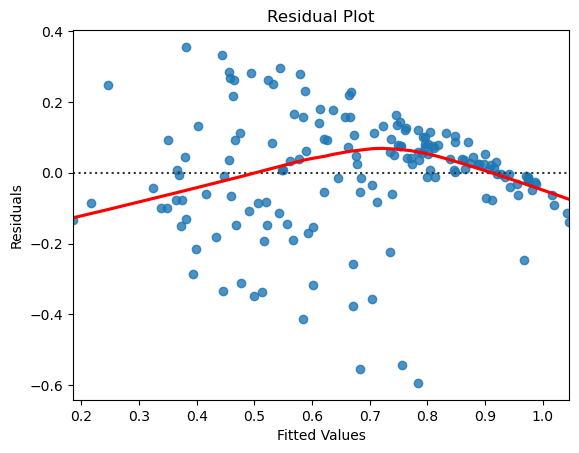

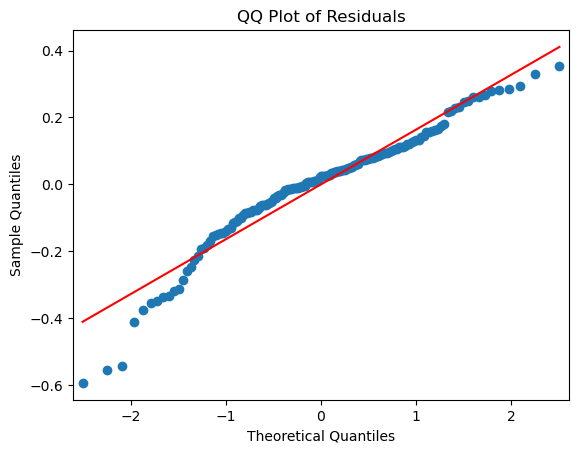

Breusch-Pagan Test: p-value = 0.14438549531828918
Durbin-Watson Test: 1.7884012626785715


In [74]:
sns.residplot(x=model3.fittedvalues, y=model3.resid, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

sm.qqplot(model3.resid, line='s')
plt.title("QQ Plot of Residuals")
plt.show()


from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model3.resid, model3.model.exog)
print(f"Breusch-Pagan Test: p-value = {bp_test[1]}")


dw_test = sm.stats.stattools.durbin_watson(model3.resid)
print(f"Durbin-Watson Test: {dw_test}")


Assumption 1: the mean of residual is 0
  From the residual plot, we can conclude the assumption 1 is reasonable.
Assumption 2: the variance of residual is constant
  From the residual plot, assumption 2 is doubtful.
Assumption 3: the residual follows normal distribution
  From the QQ plot, ragardless the truncation, the majarity of residuals follow the normal distribution.
Assumption 4: Homoscedasticity
  The p-value of Breusch-Pagan Test is 0.14438549531828918, so we fail to reject the null hypothesis, the heteroscedasticity is not present.
Assumption 5: Independence of Errors
  The value of Durbin-Watson Test is 0.14438549531828918(betwwen 0 and 2), so autocorrelation is not a major issue.